## Ejercicio Repaso

In [74]:
from lxml import html
import requests
import codecs
import Levenshtein
import pandas as pd
import numpy as np

In [33]:
pagina = 'https://dreguera.github.io/'

In [34]:
pagina

'https://dreguera.github.io/'

In [35]:
page = requests.get(pagina)
tree = html.fromstring(page.content)

In [36]:
tree

<Element html at 0x7f2837f5bef0>

### Extraer todos los mensajes de Dani

In [37]:
mensaje = tree.xpath("//div[@id='ariketa2']/div[@class='email']/div/span[@id='to']")

In [38]:
mensaje

[<Element span at 0x7f28354d4f40>,
 <Element span at 0x7f28354d4ef0>,
 <Element span at 0x7f28354d43b0>,
 <Element span at 0x7f283551cf90>,
 <Element span at 0x7f28354cf590>]

mensaje[0]


In [39]:
mensaje[3].text.split(' ')[0]

'Dani'

In [40]:
de="Carlos"
result=[]

for m in mensaje:
    a = m.text.split(' ')[0]
    if Levenshtein.distance(a,de)==0:
        result.append(a)
print(len(result))

3


### Similitud de los mensajes

In [41]:
mensaje = tree.xpath("//div[@id='ariketa2']/div[@class='email']/div/div[@id='content']")

In [42]:
mensaje

[<Element div at 0x7f28354dc8b0>,
 <Element div at 0x7f28354dcef0>,
 <Element div at 0x7f28354dc5e0>,
 <Element div at 0x7f28354dc6d0>,
 <Element div at 0x7f28354cf270>]

In [43]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
mensajes_lista = []
for m in mensaje:
    mensajes_lista.append(m.text)

In [46]:
mensajes_lista

['He estado corrigiendo los trabajos de Data Science y la parte de aprendizaje no supervisado la han realizado bastante bien, Â¿QuÃ© algoritmos de clustering has dado en clase?. Tanto basados en centroide como os basados en densidad? Supongo que ambos pero me confirmas, por favor.',
 'Hola Dani, en la parte de no supervisado me he centrado sobre todo en el clustering por densidad. Hemos visto Optics, DBSCAN y HDSCAN. Los algoritmos basados en centroide los veremos en los retos posteriores puesto que tienen mas relaciÃ³n con los diferentes escenarios que van a trabajar dentro del aprendizaje no supervisado',
 'MeanShift para clustering por densidad habeis visto? Yo suelo utilizar para datos numÃ©ricos y me da muy buenos resultados para descartar outliers. Aun asÃ\xad, si puedes pasame las diapositivas de HDBSCAN y OPTICS para echarles un vistazo en cuanto saque un rato.',
 'Si, la verdad es que MeanShift da buenos resultados pero cuando si puedes hacer ajustes manuales de otros parÃ¡met

In [47]:
vectorizer = CountVectorizer().fit_transform(mensajes_lista)
vectors = vectorizer.toarray()

In [48]:
vectors

array([[0, 0, 1, 1, 1, 0, 0, 2, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
        1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 4, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 4, 0, 1, 1, 0, 0, 0, 0,
        0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
        1, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,

In [49]:
csim=cosine_similarity(vectors)

In [50]:
csim

array([[1.        , 0.54508655, 0.17407766, 0.24480416, 0.        ],
       [0.54508655, 1.        , 0.16480441, 0.2269011 , 0.        ],
       [0.17407766, 0.16480441, 1.        , 0.27535804, 0.        ],
       [0.24480416, 0.2269011 , 0.27535804, 1.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ]])

In [51]:
mensajes_lista[0]

'He estado corrigiendo los trabajos de Data Science y la parte de aprendizaje no supervisado la han realizado bastante bien, Â¿QuÃ© algoritmos de clustering has dado en clase?. Tanto basados en centroide como os basados en densidad? Supongo que ambos pero me confirmas, por favor.'

In [52]:
mensajes_lista[1]

'Hola Dani, en la parte de no supervisado me he centrado sobre todo en el clustering por densidad. Hemos visto Optics, DBSCAN y HDSCAN. Los algoritmos basados en centroide los veremos en los retos posteriores puesto que tienen mas relaciÃ³n con los diferentes escenarios que van a trabajar dentro del aprendizaje no supervisado'

In [54]:
def cosine_sim_vectors(vec1,vec2):
    vec1 = vec1.reshape(1,-1)
    vec2 = vec2.reshape(1,-1)
    return cosine_similarity(vec1,vec2)[0][0]

In [57]:
cosine_sim_vectors(vectors[2],vectors[3])

0.27535804017703097

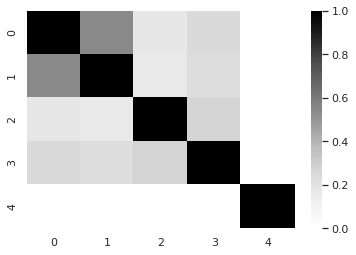

In [56]:
import seaborn as sns; sns.set_theme()
ax = sns.heatmap(csim, cmap='Greys')

### Similitud

In [188]:
mensajes_lista[0]

'He estado corrigiendo los trabajos de Data Science y la parte de aprendizaje no supervisado la han realizado bastante bien, Â¿QuÃ© algoritmos de clustering has dado en clase?. Tanto basados en centroide como os basados en densidad? Supongo que ambos pero me confirmas, por favor.'

In [189]:
mensajes_lista[1]

'Hola Dani, en la parte de no supervisado me he centrado sobre todo en el clustering por densidad. Hemos visto Optics, DBSCAN y HDSCAN. Los algoritmos basados en centroide los veremos en los retos posteriores puesto que tienen mas relaciÃ³n con los diferentes escenarios que van a trabajar dentro del aprendizaje no supervisado'

In [61]:

import string
import nltk
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize, sent_tokenize

from lxml import html
import requests
import codecs

import gensim


In [62]:
file_docs=[]
file_docs2=[]
tokens = sent_tokenize(mensajes_lista[0])
for line in tokens:
    file_docs.append(line)
    
tokens = sent_tokenize(mensajes_lista[1])
for line in tokens:
    file_docs2.append(line)

In [63]:
mensajes_lista[0].split('. ')

['He estado corrigiendo los trabajos de Data Science y la parte de aprendizaje no supervisado la han realizado bastante bien, Â¿QuÃ© algoritmos de clustering has dado en clase?',
 'Tanto basados en centroide como os basados en densidad? Supongo que ambos pero me confirmas, por favor.']

In [64]:
file_docs

['He estado corrigiendo los trabajos de Data Science y la parte de aprendizaje no supervisado la han realizado bastante bien, Â¿QuÃ© algoritmos de clustering has dado en clase?.',
 'Tanto basados en centroide como os basados en densidad?',
 'Supongo que ambos pero me confirmas, por favor.']

In [65]:
file_docs2

['Hola Dani, en la parte de no supervisado me he centrado sobre todo en el clustering por densidad.',
 'Hemos visto Optics, DBSCAN y HDSCAN.',
 'Los algoritmos basados en centroide los veremos en los retos posteriores puesto que tienen mas relaciÃ³n con los diferentes escenarios que van a trabajar dentro del aprendizaje no supervisado']

In [66]:
gen_docs = [[w.lower() for w in word_tokenize(text)] 
            for text in file_docs]

In [67]:
gen_docs2 = [[w.lower() for w in word_tokenize(text)] 
            for text in file_docs2]

In [68]:
gen_docs

[['he',
  'estado',
  'corrigiendo',
  'los',
  'trabajos',
  'de',
  'data',
  'science',
  'y',
  'la',
  'parte',
  'de',
  'aprendizaje',
  'no',
  'supervisado',
  'la',
  'han',
  'realizado',
  'bastante',
  'bien',
  ',',
  'â¿quã©',
  'algoritmos',
  'de',
  'clustering',
  'has',
  'dado',
  'en',
  'clase',
  '?',
  '.'],
 ['tanto',
  'basados',
  'en',
  'centroide',
  'como',
  'os',
  'basados',
  'en',
  'densidad',
  '?'],
 ['supongo',
  'que',
  'ambos',
  'pero',
  'me',
  'confirmas',
  ',',
  'por',
  'favor',
  '.']]

In [69]:
dictionary = gensim.corpora.Dictionary(gen_docs)
print(dictionary.token2id)

{',': 0, '.': 1, '?': 2, 'algoritmos': 3, 'aprendizaje': 4, 'bastante': 5, 'bien': 6, 'clase': 7, 'clustering': 8, 'corrigiendo': 9, 'dado': 10, 'data': 11, 'de': 12, 'en': 13, 'estado': 14, 'han': 15, 'has': 16, 'he': 17, 'la': 18, 'los': 19, 'no': 20, 'parte': 21, 'realizado': 22, 'science': 23, 'supervisado': 24, 'trabajos': 25, 'y': 26, 'â¿quã©': 27, 'basados': 28, 'centroide': 29, 'como': 30, 'densidad': 31, 'os': 32, 'tanto': 33, 'ambos': 34, 'confirmas': 35, 'favor': 36, 'me': 37, 'pero': 38, 'por': 39, 'que': 40, 'supongo': 41}


In [70]:
corpus = [dictionary.doc2bow(gen_doc) for gen_doc in gen_docs]


In [71]:
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 3),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 2),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1)],
 [(2, 1), (13, 2), (28, 2), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1)],
 [(0, 1),
  (1, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1)]]

In [72]:
tf_idf = gensim.models.TfidfModel(corpus)


In [79]:
for doc in tf_idf[corpus]:
    print([[dictionary[id], np.around(freq, decimals=2)] for id, freq in doc])

[[',', 0.06], ['.', 0.06], ['?', 0.06], ['algoritmos', 0.17], ['aprendizaje', 0.17], ['bastante', 0.17], ['bien', 0.17], ['clase', 0.17], ['clustering', 0.17], ['corrigiendo', 0.17], ['dado', 0.17], ['data', 0.17], ['de', 0.5], ['en', 0.06], ['estado', 0.17], ['han', 0.17], ['has', 0.17], ['he', 0.17], ['la', 0.34], ['los', 0.17], ['no', 0.17], ['parte', 0.17], ['realizado', 0.17], ['science', 0.17], ['supervisado', 0.17], ['trabajos', 0.17], ['y', 0.17], ['â¿quã©', 0.17]]
[['?', 0.12], ['en', 0.24], ['basados', 0.64], ['centroide', 0.32], ['como', 0.32], ['densidad', 0.32], ['os', 0.32], ['tanto', 0.32]]
[[',', 0.13], ['.', 0.13], ['ambos', 0.35], ['confirmas', 0.35], ['favor', 0.35], ['me', 0.35], ['pero', 0.35], ['por', 0.35], ['que', 0.35], ['supongo', 0.35]]


In [80]:
sims = gensim.similarities.Similarity('b/',tf_idf[corpus],
                                        num_features=len(dictionary))

In [81]:
for line in file_docs2:
    query_doc = [w.lower() for w in word_tokenize(line)]
    query_doc_bow = dictionary.doc2bow(query_doc)

In [82]:
query_doc_tf_idf = tf_idf[query_doc_bow]


In [85]:
print('Comparing Result:', sims[query_doc_tf_idf]) 


Comparing Result: [0.2693112  0.22112931 0.13496569]


In [86]:
import numpy as np

sum_of_sims =(np.sum(sims[query_doc_tf_idf], dtype=np.float32))
print(sum_of_sims)

0.62540615


In [163]:
percentage_of_similarity = round(float((sum_of_sims / len(file_docs)) * 100))
print(f'Average similarity float: {float(sum_of_sims / len(file_docs))}')
print(f'Average similarity percentage: {float(sum_of_sims / len(file_docs)) * 100}')
print(f'Average similarity rounded percentage: {percentage_of_similarity}')

Average similarity float: 0.20846871534983316
Average similarity percentage: 20.846871534983315
Average similarity rounded percentage: 21


### Cosine Similarity

In [95]:
doc_trump = "Mr. Trump became president after winning the political election. Though he lost the support of some republican friends, Trump is friends with President Putin"

doc_election = "President Trump says Putin had no political interference is the election outcome. He says it was a witchhunt by political parties. He claimed President Putin is a friend who had nothing to do with the election"

doc_putin = "Post elections, Vladimir Putin became President of Russia. President Putin had served as the Prime Minister earlier in his political career"

documents = [doc_trump, doc_election, doc_putin]

In [96]:
documents


['Mr. Trump became president after winning the political election. Though he lost the support of some republican friends, Trump is friends with President Putin',
 'President Trump says Putin had no political interference is the election outcome. He says it was a witchhunt by political parties. He claimed President Putin is a friend who had nothing to do with the election',
 'Post elections, Vladimir Putin became President of Russia. President Putin had served as the Prime Minister earlier in his political career']

In [97]:
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
vectorizer = CountVectorizer().fit_transform(documents)
vectors = vectorizer.toarray()


In [98]:
vectors

array([[1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
        0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 2, 0, 0,
        0, 1, 0, 1],
       [0, 0, 0, 1, 0, 1, 1, 0, 2, 0, 1, 0, 2, 2, 0, 0, 1, 2, 1, 0, 0, 0,
        1, 1, 0, 1, 1, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 1, 0, 1,
        1, 0, 1, 1],
       [0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 1, 1, 2, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0]])

In [99]:
csim=cosine_similarity(vectors)

In [100]:
csim

array([[1.        , 0.51480485, 0.38890873],
       [0.51480485, 1.        , 0.38829014],
       [0.38890873, 0.38829014, 1.        ]])

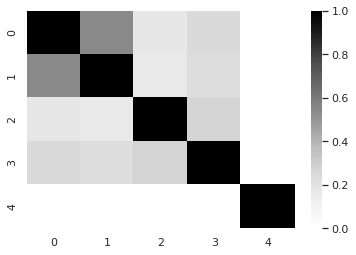

In [92]:
import seaborn as sns; sns.set_theme()
ax = sns.heatmap(csim, cmap='Greys')